## GRIP Task 3 (The Sparks Foundation)
### Author - Uday Kamal

## Aim - 
### 1. To perform exploratory data analysis on sample super store.
### 2. To find out which items yield maximum percentage of profit.

In [23]:
# For data manipulation
import pandas as pd
import numpy as np
# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### The Dataframe

In [24]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### 1. Checking for any null values and visualising them.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


Text(0.5, 1.0, 'Visibility of any null values')

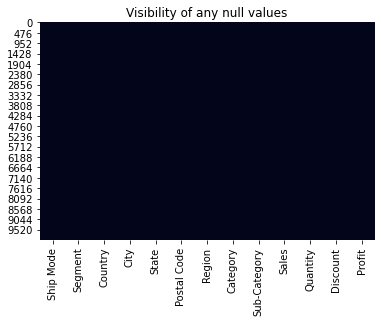

In [25]:
print(df.isnull().sum())
sns.heatmap(df.isnull(),cbar=False)
plt.title('Visibility of any null values')

In [26]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### 2. Looking at pairwise relationships in a dataset.

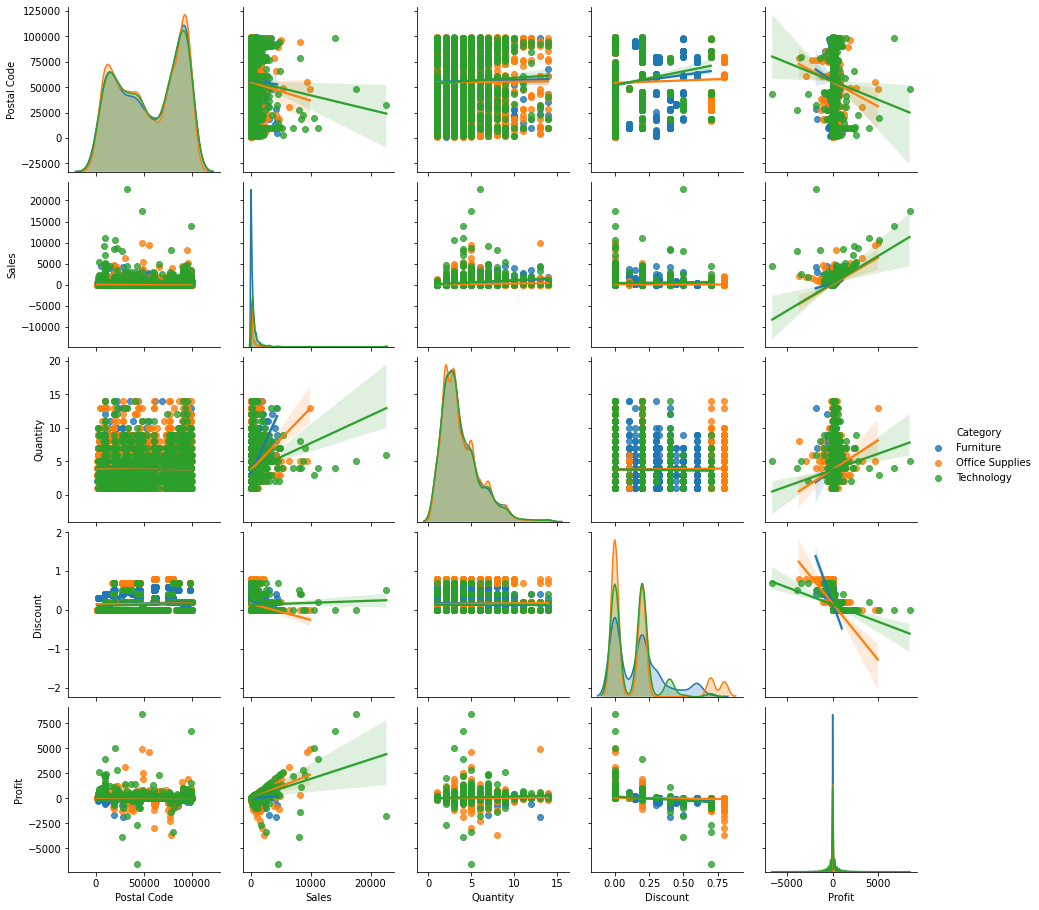

In [27]:
sns.pairplot(df,hue='Category',kind='reg')

### 3. Visualising correlation between each field in dataset.

Text(0.5, 1.0, 'Correlation between each parameter')

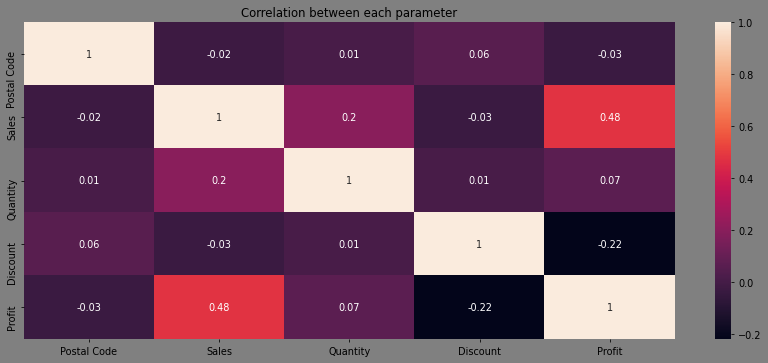

In [28]:
plt.figure(figsize=(15,6),dpi=70,facecolor='grey')
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.title('Correlation between each parameter')

### 4. Checking which category of item has highest purchases.

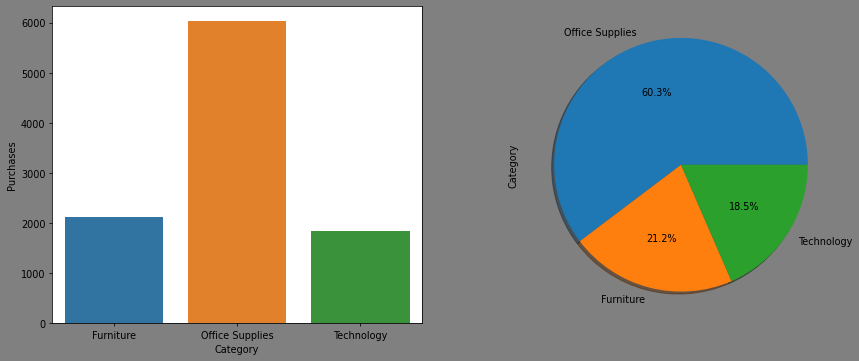

In [29]:
plt.figure(figsize=(15,6),dpi=70,facecolor='grey')
plt.subplot(1,2,1)
sns.countplot(df['Category'])
plt.ylabel('Purchases')
plt.subplot(1,2,2)
df['Category'].value_counts().plot(kind='pie',shadow=True,autopct='%1.1f%%')


### 5. Checking which item has the highest purchase while categorizing each to their respective category.

Text(0, 0.5, 'Purchases')

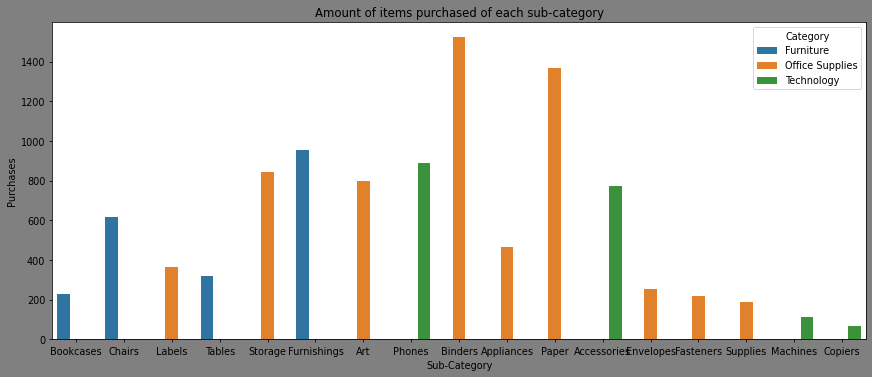

In [30]:
plt.figure(figsize=(15,6),dpi=70,facecolor='grey')
sns.countplot(df['Sub-Category'],hue=df['Category'])
plt.title('Amount of items purchased of each sub-category')
plt.ylabel('Purchases')

### 6. Checking the distribution of the sales density from 0 to 600 while plotting the average sales and 75% of sales.

Text(0.5, 1.0, 'Sales density from 0 to 600 sales')

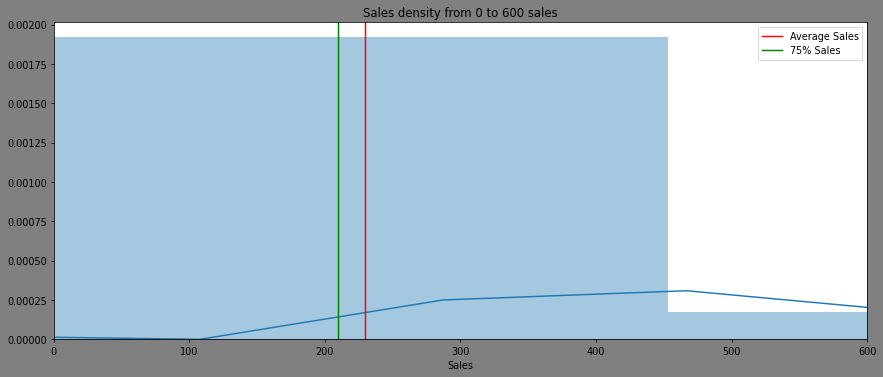

In [31]:
plt.figure(figsize=(15,6),dpi=70,facecolor='grey')
sns.distplot(df['Sales'])
plt.axvline(np.mean(df['Sales']),label='Average Sales',c='red')
plt.axvline(np.percentile(df['Sales'],75),label='75% Sales',c='green')
plt.legend()
plt.xlim(0,600)
plt.title('Sales density from 0 to 600 sales')

### 7. Checking for which region has highest purchases with another plot to categorize them according to item category.


Text(0.5, 1.0, 'Category purchased from each region')

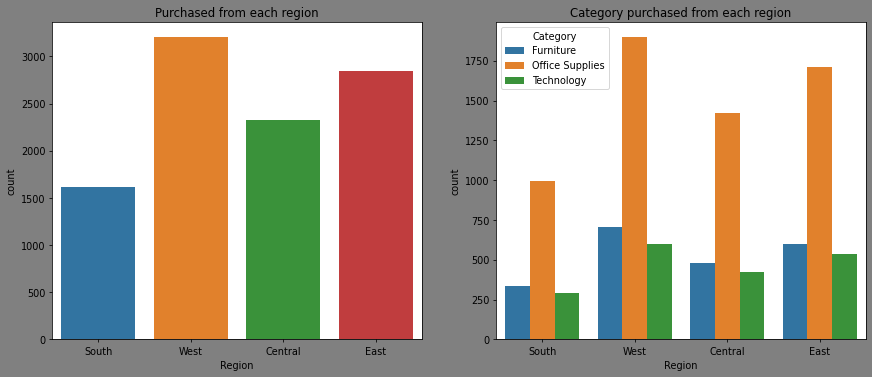

In [32]:
plt.figure(figsize=(15,6),dpi=70,facecolor='grey')
plt.subplot(1,2,1)
sns.countplot(df['Region'])
plt.title('Purchased from each region')
plt.subplot(1,2,2)
sns.countplot(df['Region'],hue=df['Category'])
plt.title('Category purchased from each region')

In [33]:
state=df['State'].value_counts()
perc=((state.max()-state.min())/state.max())*100
print(state.idxmax(),'is the state having highest number of purchases of',state.max(),
      '\nthat is',np.round(perc,2),'% higher than',state.idxmin(),'having lowest number of purchases of just',state.min())

California is the state having highest number of purchases of 2001 
that is 99.95 % higher than Wyoming having lowest number of purchases of just 1


In [34]:
cat=df['Category'].value_counts()
perc=((cat.max()-cat.min())/cat.max())*100
print(cat.idxmax(),'has highest number of purchases of',cat.max(),
      'that is',np.round(perc,0),'% higher than',cat.idxmin(),' having number of purchases of',cat.min())

Office Supplies has highest number of purchases of 6026 that is 69.0 % higher than Technology  having number of purchases of 1847


### 8. Creating a table that categorizes each US-state of purchase into Segment and give a total count in each item category

In [35]:
pd.crosstab([df.State,df.Segment],[df.Category],margins=True).style.background_gradient(cmap='summer')

### 9. Creating an animated scatter plot for sales vs profit in each city of each state.

In [36]:
#To get the data that is grouped by the states.
sd1=df.groupby(['State','City','Sales','Profit','Quantity'],as_index=False).sum()
sd1.head(10)

,State,City,Sales,Profit,Quantity,Postal Code,Discount
0,Alabama,Auburn,3.76,1.0904,2,36830,0.0
1,Alabama,Auburn,7.38,3.3948,2,36830,0.0
2,Alabama,Auburn,13.08,6.0168,2,36830,0.0
3,Alabama,Auburn,350.98,84.2352,1,36830,0.0
4,Alabama,Auburn,491.55,240.8595,5,36830,0.0
5,Alabama,Auburn,900.08,117.0104,4,36830,0.0
6,Alabama,Decatur,14.94,6.8724,3,35601,0.0
7,Alabama,Decatur,16.74,8.0352,3,35601,0.0
8,Alabama,Decatur,19.14,8.8044,3,35601,0.0
9,Alabama,Decatur,23.92,11.7208,4,35601,0.0


In [37]:
fig=px.scatter(sd1,x='Sales',y='Profit',color='City',size='Quantity',size_max=60,
           animation_frame='State',animation_group='City',
           title='Sales vs Profit in each cities of each state (Sized by quantity)')
fig.update(layout_showlegend=False)
fig.show()

In [38]:
states=df['State'].unique()
print('These were the States that were in the above animated plot -\n',states)

These were the States that were in the above animated plot -
 ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


### 10. Finding the cost for each item in the dataset.

In [39]:
df['Cost']=df['Sales']-df['Profit']
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516


In [40]:
cost=df.groupby(['Category','Sub-Category'],as_index=False)['Cost'].sum()

### 11. Checking which item category has highest cost of purchases & further dividing them into the sub-categories.

In [41]:
cat=px.bar(cost,x='Category',y='Cost',color='Category',title='Total cost of sales of each category',labels={'Cost':'Total Cost'})
scat=px.bar(cost,x='Sub-Category',y='Cost',color='Category',title='Total cost of sales of each sub-category',labels={'Cost':'Total Cost'})
cat.show()
scat.show()

#### From the above plots it is clear that chairs from furniture, storage items from office supplies and phones from technology has the highest total cost in purchase.

### 12. Checking which item yields maximum percentage of profit.

In [42]:
#creating a data column containing profit %
df['Profit %']=(df['Profit']/df['Cost'])*100
df_profit=df.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %',as_index=False)
df_profit.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,United States,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,United States,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,United States,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,United States,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


In [43]:
#storing the items names in a list that contains 100% profit.
items=[]
for i in df['Sub-Category']:
  for a in df['Profit %']:
    if a==100.000000:
      if i not in items:
        items.append(i)

In [44]:
print('There are',len(items),'items that gives a 100% profit to the stores')
print('They are',items[0:6],'\n',items[6:12],'\n',items[12:17])

There are 17 items that gives a 100% profit to the stores
They are ['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage', 'Furnishings'] 
 ['Art', 'Phones', 'Binders', 'Appliances', 'Paper', 'Accessories'] 
 ['Envelopes', 'Fasteners', 'Supplies', 'Machines', 'Copiers']
